# Numerical differentiation
In this little notebook, we'll take a look at how numerical differentiation works in SciPy.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# The big new function for today:
from scipy.misc import derivative

Here's a function that looks like it might be fun to play with.

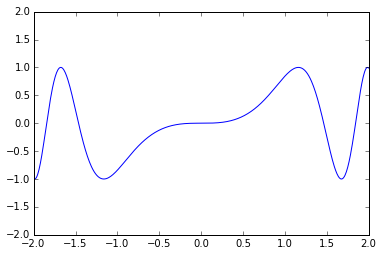

In [2]:
def f(x): return np.sin(x**3)
xs = np.linspace(-2,2,500)
ys1 = f(xs)
plt.plot(xs,ys1)
ax = plt.gca()
ax.set_ylim(-2,2);

The call `derivative(f,x0)` computes the numerical value of the derivate of the real valued function `f` at the point `x0`. It's got several optional arguments and `dx`, in particular, is worth setting lower than the default.

In [3]:
derivative(f,1,dx=0.01)

1.6199604899790943

Let's plot the function together with its derivative.

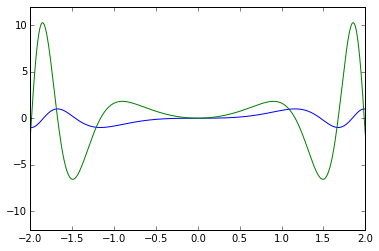

In [4]:
plt.plot(xs,ys1)
ys2 = derivative(f,xs, dx=0.001)
plt.plot(xs,ys2)
ax = plt.gca()
ax.set_ylim(-12,12);

Of course, this particular function has a simple derivative, which we can use to check against the numerical derivative.

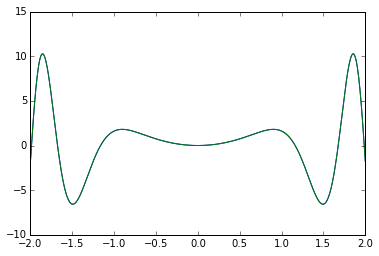

In [5]:
plt.plot(xs,ys2)
def fp(x): return 3*x**2*np.cos(x**3)
ys3 = fp(xs)
plt.plot(xs,ys3);

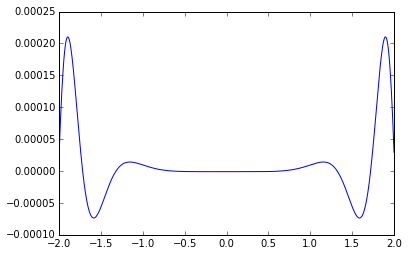

In [6]:
plt.plot(xs,ys3-ys2);

Interesting.

Of course, some functions don't have a simple formula. Functions obtained from data, for example. Here's a fun example.

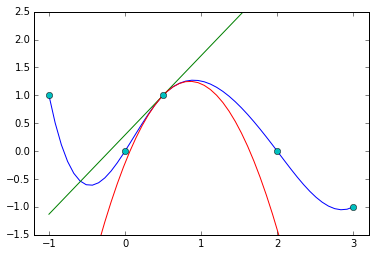

In [7]:
from scipy.interpolate import interp1d
x_data = [-1,0,0.5,2,3]
y_data = [1,0,1,0,-1]

f = interp1d(x_data,y_data, kind='cubic')
xs = np.linspace(min(x_data),max(x_data))
ys = f(xs)
plt.plot(xs,ys)

x0 = x_data[2]
y0 = y_data[2]
m = derivative(f,x0,0.01)
def l(x): return y0+m*(x-x0)
ys = l(xs)
plt.plot(xs,ys)

m2 = derivative(f,x0,0.01, n=2)
def q(x): return y0+m*(x-x0) + m2*(x-x0)**2/2
ys = q(xs)
plt.plot(xs,ys)

plt.plot(x_data, y_data, 'o')

ax = plt.gca()
ax.set_ylim(-1.5,2.5)
ax.set_xlim(-1.2,3.2);